In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "./data/DATA.xlsx"

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,PH,Cond.(uS/cm),TDS (PPM),DO (mg/lts),ORP (mg/ltr),Turbidity (N.T.U.)
0,8.5,3.01,1230,10.0,281,2
1,8.0,0.92,429,12.0,294,2
2,7.5,1.73,714,14.5,277,2
3,7.0,3.28,1260,12.5,292,2
4,6.8,3.32,1280,12.0,302,2


In [5]:
df_summary = df.describe()
df_summary

,PH,Cond.(uS/cm),TDS (PPM),DO (mg/lts),ORP (mg/ltr),Turbidity (N.T.U.)
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,7.461122,1.273968,628.032064,8.049699,283.995992,1.334669
std,0.629505,1.218214,507.529581,1.667374,56.883450,2.008571
min,5.500000,0.000000,42.000000,1.700000,136.000000,0.000000
25%,7.000000,0.490000,304.500000,7.000000,255.000000,0.000000
50%,7.500000,0.910000,475.000000,8.000000,275.000000,1.000000
75%,8.000000,1.565000,748.000000,9.000000,306.000000,2.000000
max,9.000000,7.900000,3410.000000,16.000000,437.000000,24.000000


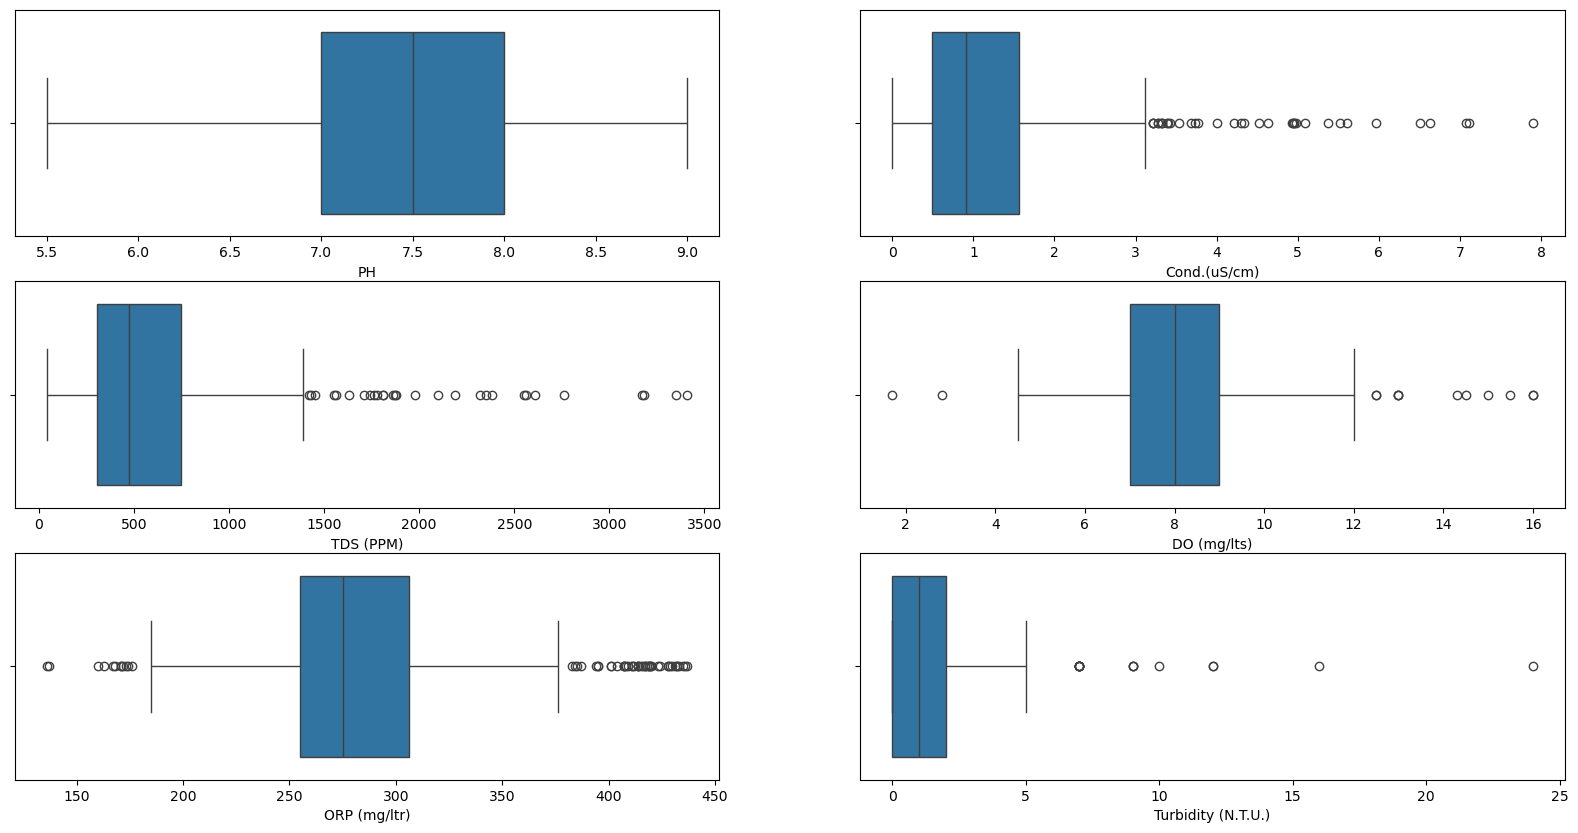

In [6]:
# plot each column's data distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 2, figsize = (20,10));
col_cnt = 0
col_names = df.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.boxplot(df[col_names[col_cnt]], ax=axes[r][c], orient="h");
            col_cnt += 1
        except:
            pass

In [7]:
# removing outliers
outlier_cols = ["Cond.(uS/cm)", "TDS (PPM)", "DO (mg/lts)", "ORP (mg/ltr)"]
def cap_outliers(df, col):
    """
    Cap the outliers in the column by replacing them with the mean of the column.
    """
    q1 = df_summary[col].loc["25%"]
    q3 = df_summary[col].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"]
    df.loc[df[col] > upper_bound, col] = df_summary[col].loc["mean"]
    return df
    
    
for col in outlier_cols:
    df = cap_outliers(df, col)

/tmp/ipykernel_618365/4225608377.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '628.0320641282565' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"]
/tmp/ipykernel_618365/4225608377.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '283.99599198396794' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"]


In [8]:
# nuber of missing values in each column
missing_values = df.isnull().sum()
missing_values

PH                    0
Cond.(uS/cm)          0
TDS (PPM)             0
DO (mg/lts)           0
ORP (mg/ltr)          0
Turbidity (N.T.U.)    0
dtype: int64

In [9]:
# def impute_values(alg, df, a, cols):
#     df[a] = df[a].replace({0: np.nan})
#     df_notnull = df[df[a].notna()]
    
#     X = df_notnull[cols]
#     y = df_notnull[a]
    
#     df_null = df[df[a].isna()]
#     test_X = df_null[cols]

#     regr = alg
#     regr.fit(X, y)

#     pred = regr.predict(test_X)
#     df_null = df[df[a].isna()]
#     df_null[a] = pred
    
#     xx = df[df[a].notna()]
#     xx["null"] = 0
#     df_null["null"] = 1
#     df = pd.concat([xx, df_null], axis=0)
#     cols.append(a)
#     return df

In [10]:
# from sklearn.linear_model import LinearRegression
# for col, params in {"Cond.(uS/cm)": ["TDS (PPM)", "DO (mg/lts)", "ORP (mg/ltr)"],
#                     "TDS (PPM)": ["Cond.(uS/cm)", "DO (mg/lts)", "ORP (mg/ltr)"],
#                     "DO (mg/lts)": ["Cond.(uS/cm)", "TDS (PPM)", "ORP (mg/ltr)"],
#                     "ORP (mg/ltr)": ["Cond.(uS/cm)", "TDS (PPM)", "DO (mg/lts)"]}.items():
#     alg = LinearRegression()
#     df = impute_values(alg, df, col, params)
    
# fig, axes = plt.subplots(1, 3, figsize = (20,5))

# sns.scatterplot(y="Cond.(uS/cm)", x="PH", data=df, hue="null", ax=axes[0], alpha=0.5, palette=["steelblue", "green"])
# sns.scatterplot(y="TDS (PPM)", x="PH", data=df, hue="null", ax=axes[1], alpha=0.5, palette=["steelblue", "green"])
# sns.scatterplot(y="DO (mg/lts)", x="PH", data=df, hue="null", ax=axes[2], alpha=0.5, palette=["steelblue", "green"])
# plt.show()

In [11]:
target_col = ["Turbidity (N.T.U.)"]
col_names = df.columns.to_list()
col_names.remove(target_col[0])

<Axes: >

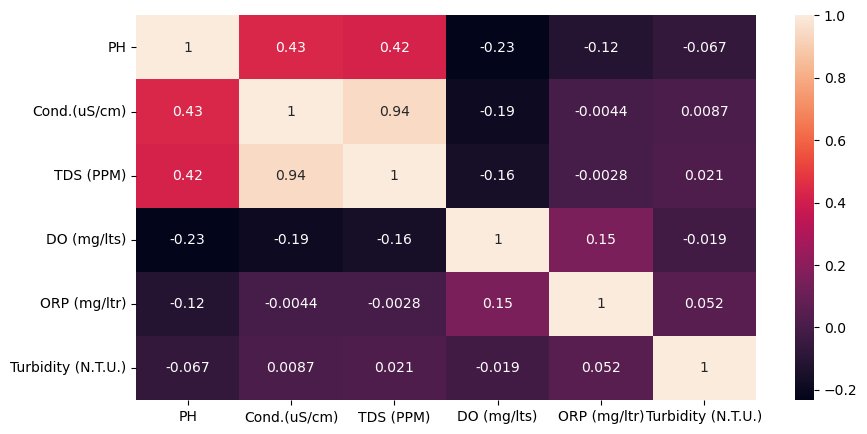

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df[col_names + target_col].corr(), fmt=".2g", annot=True)

In [13]:
from sklearn.decomposition import PCA

def create_pca_feature(df):
    pca = PCA(n_components=1)
    combined = pca.fit_transform(df[['Cond.(uS/cm)', 'TDS (PPM)']])
    return combined

df["PCA"] = create_pca_feature(df)
col_names.append("PCA")
col_names.remove("Cond.(uS/cm)")
col_names.remove("TDS (PPM)")

<Axes: >

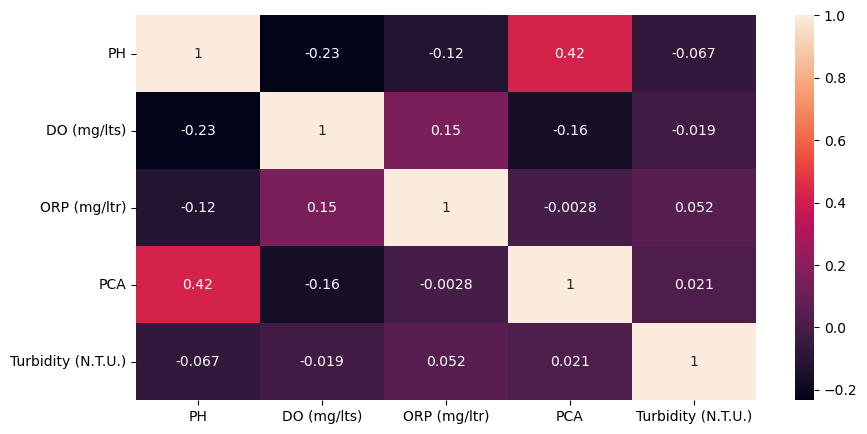

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df[col_names + target_col].corr(), fmt=".2g", annot=True)

<Axes: xlabel='Turbidity (N.T.U.)', ylabel='Count'>

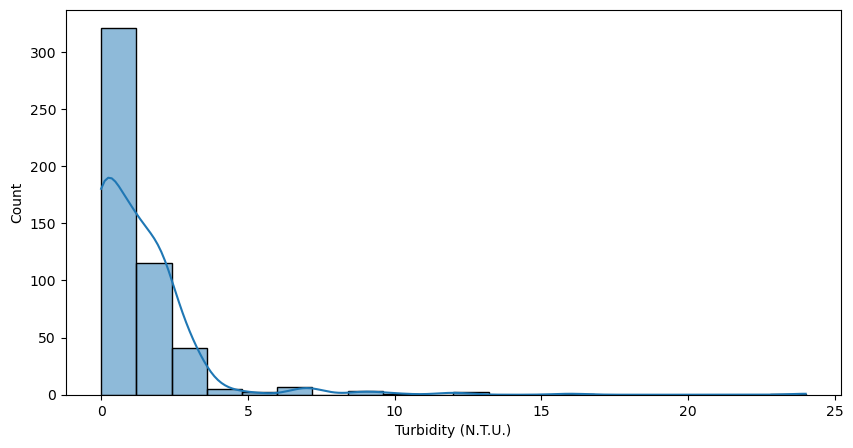

In [16]:
# draw a histogram of the target column
plt.figure(figsize=(10,5))
sns.histplot(df[target_col[0]], bins=20, kde=True)

In [18]:
train_df = df.sample(frac=0.8, random_state=0)[col_names + target_col]
test_df = df.drop(train_df.index)[col_names + target_col]

train_df.head()

,PH,DO (mg/lts),ORP (mg/ltr),PCA,Turbidity (N.T.U.)
90,7.0,9.600000,281.000000,-348.932608,2
254,7.6,9.000000,251.000000,162.068729,1
283,8.3,5.800000,203.000000,162.068927,1
444,7.9,8.049699,283.995992,577.070123,16
474,7.5,8.100000,283.995992,-232.932383,0


## Modeling